In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [75]:
data=pd.read_csv("crime_data.csv")

In [76]:
pd.set_option("display.max_rows",None)

In [77]:
data 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [78]:
data.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [79]:
data.head()

,City,Murder,Assault,Urbanpop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   Urbanpop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [81]:
data.describe()

,Murder,Assault,Urbanpop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [82]:
data.loc[:,'Total'] = data.sum(numeric_only=True, axis=1)

In [83]:
data 

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6
5,Colorado,7.9,204,78,38.7,328.6
6,Connecticut,3.3,110,77,11.1,201.4
7,Delaware,5.9,238,72,15.8,331.7
8,Florida,15.4,335,80,31.9,462.3
9,Georgia,17.4,211,60,25.8,314.2


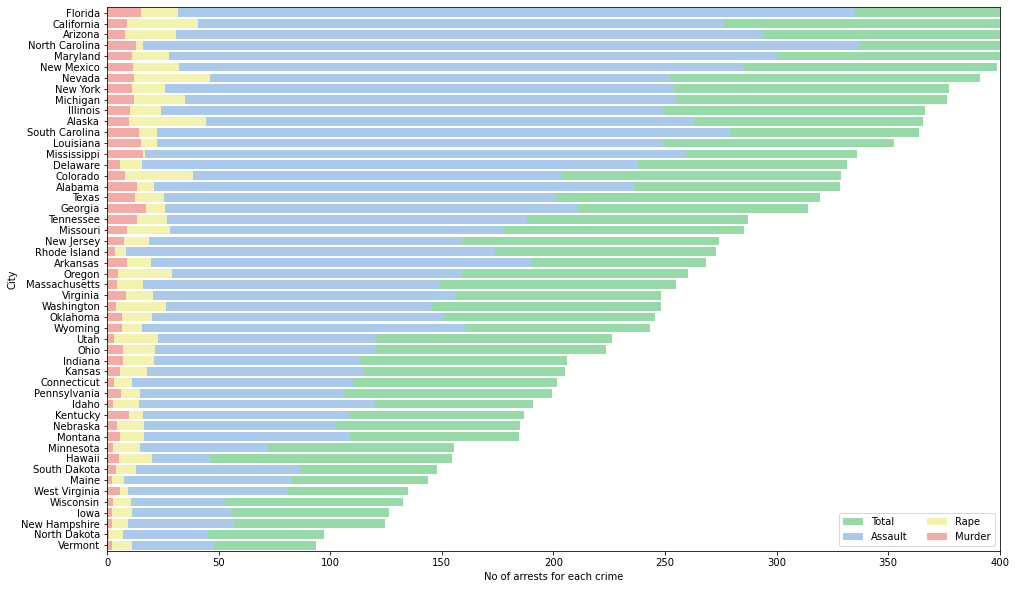

In [84]:
f, ax = plt.subplots(figsize=(16, 10))

stats = data.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="No of arrests for each crime");

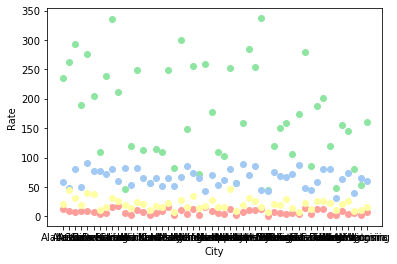

In [85]:
plt.scatter(data.City, data.Murder, color='r')
plt.scatter(data.City, data.Assault, color='g')
plt.scatter(data.City, data.Urbanpop, color='b')
plt.scatter(data.City, data.Rape, color='y')
plt.xlabel('City')
plt.ylabel('Rate')
plt.show()

In [86]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [87]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,Urbanpop,Rape,Total
0,0.746988,0.654110,0.440678,0.359173,0.637029
1,0.554217,0.746575,0.271186,0.961240,0.737598
2,0.439759,0.852740,0.813559,0.612403,0.866631
3,0.481928,0.496575,0.305085,0.315245,0.474112
4,0.493976,0.791096,1.000000,0.860465,0.876118
5,0.427711,0.544521,0.779661,0.811370,0.637571
6,0.150602,0.222603,0.762712,0.098191,0.292762
7,0.307229,0.660959,0.677966,0.219638,0.645975
8,0.879518,0.993151,0.813559,0.635659,1.000000
9,1.000000,0.568493,0.474576,0.478036,0.598536


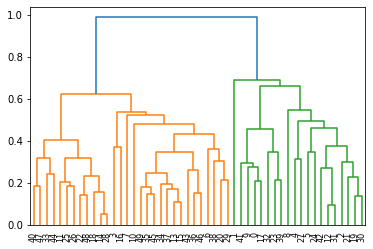

In [88]:
#Dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

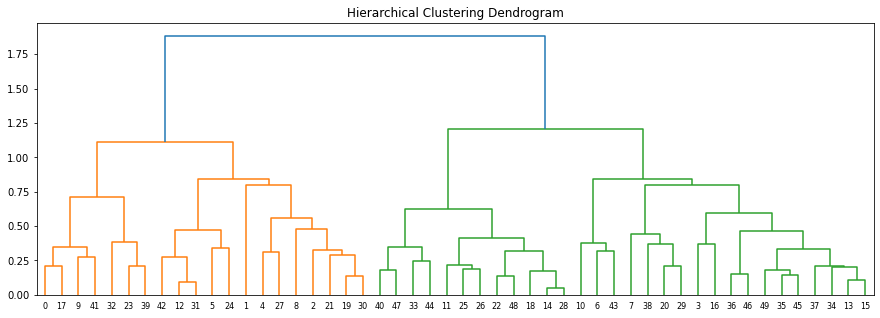

In [89]:
from scipy.cluster.hierarchy import linkage 

import scipy.cluster.hierarchy as sch # for creating dendrogram 

type(df_norm)

#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [90]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [91]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [92]:
data['h_clusterid']=hc.labels_
data  

,City,Murder,Assault,Urbanpop,Rape,Total,h_clusterid
0,Alabama,13.2,236,58,21.2,328.4,0
1,Alaska,10.0,263,48,44.5,365.5,0
2,Arizona,8.1,294,80,31.0,413.1,0
3,Arkansas,8.8,190,50,19.5,268.3,1
4,California,9.0,276,91,40.6,416.6,0
5,Colorado,7.9,204,78,38.7,328.6,0
6,Connecticut,3.3,110,77,11.1,201.4,1
7,Delaware,5.9,238,72,15.8,331.7,1
8,Florida,15.4,335,80,31.9,462.3,0
9,Georgia,17.4,211,60,25.8,314.2,0


# K-means

In [93]:
data1=pd.read_csv("crime_data.csv")
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [94]:
data1.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [95]:
data1.loc[:,'Total'] = data1.sum(numeric_only=True, axis=1)

In [96]:
data1

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6
5,Colorado,7.9,204,78,38.7,328.6
6,Connecticut,3.3,110,77,11.1,201.4
7,Delaware,5.9,238,72,15.8,331.7
8,Florida,15.4,335,80,31.9,462.3
9,Georgia,17.4,211,60,25.8,314.2


In [97]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data1.iloc[:,1:])
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.64788892],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.02893964],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.51783489],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.03060731],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.55378307],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.6499431 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.65651649],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.68178292],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  2.0231636 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.50204202],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.1382221 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.76538812],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.03818345],
       [-0.13637203, -0.70012057, -0.0

C:\Users\Pavani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


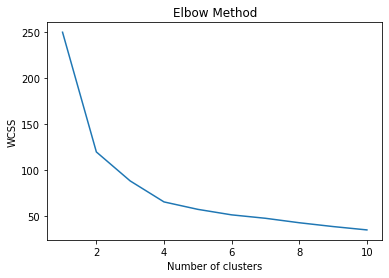

In [98]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [101]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,Urbanpop,Rape,Total,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0.637029,0.0
1,0.554217,0.746575,0.271186,0.961240,0.737598,0.0
2,0.439759,0.852740,0.813559,0.612403,0.866631,0.0
3,0.481928,0.496575,0.305085,0.315245,0.474112,0.5
4,0.493976,0.791096,1.000000,0.860465,0.876118,0.0
5,0.427711,0.544521,0.779661,0.811370,0.637571,0.0
6,0.150602,0.222603,0.762712,0.098191,0.292762,0.5
7,0.307229,0.660959,0.677966,0.219638,0.645975,0.5
8,0.879518,0.993151,0.813559,0.635659,1.000000,0.0
9,1.000000,0.568493,0.474576,0.478036,0.598536,0.0


In [102]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_norm)

In [103]:
y_kmeans

array([1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [104]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [105]:
df['cluster'] = cluster

In [107]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,6.1,140.1,71.3,18.7,236.1
2,14.7,251.3,54.3,21.7,341.9
3,10.8,257.4,76.0,33.2,377.4
4,3.1,76.0,52.1,11.8,143.0


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

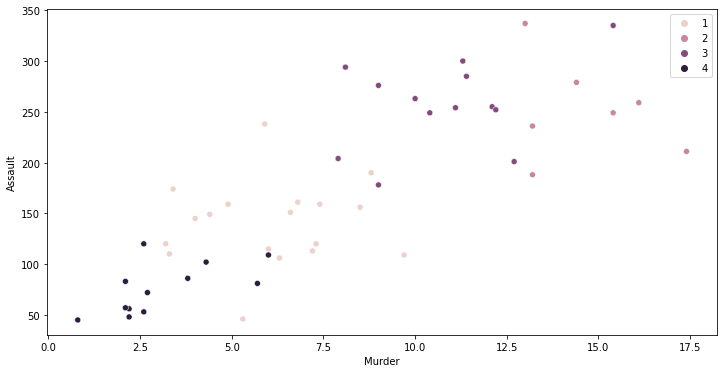

In [109]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_kmeans1)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

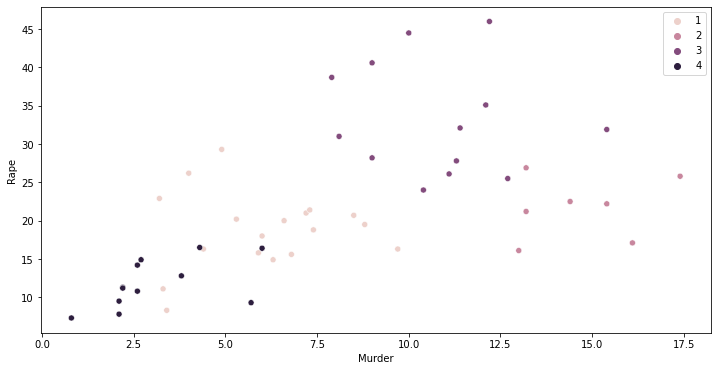

In [110]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Rape'],hue=y_kmeans1)

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

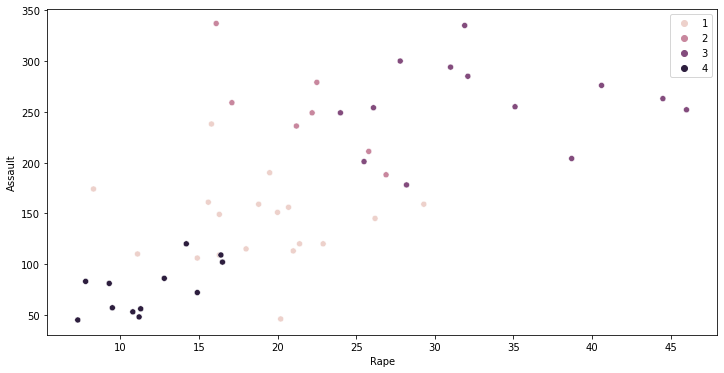

In [111]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Rape'], y = df['Assault'],hue=y_kmeans1)

In [112]:
stats = df.sort_values("Total", ascending=True)
df_total= pd.DataFrame(stats)

In [113]:
df_total

,Murder,Assault,Urbanpop,Rape,Total,cluster
44,2.2,48,32,11.2,93.4,4
33,0.8,45,44,7.3,97.1,4
28,2.1,57,56,9.5,124.6,4
14,2.2,56,57,11.3,126.5,4
48,2.6,53,66,10.8,132.4,4
47,5.7,81,39,9.3,135.0,4
18,2.1,83,51,7.8,143.9,4
40,3.8,86,45,12.8,147.6,4
10,5.3,46,83,20.2,154.5,1
22,2.7,72,66,14.9,155.6,4


In [114]:
df_total.head()

,Murder,Assault,Urbanpop,Rape,Total,cluster
44,2.2,48,32,11.2,93.4,4
33,0.8,45,44,7.3,97.1,4
28,2.1,57,56,9.5,124.6,4
14,2.2,56,57,11.3,126.5,4
48,2.6,53,66,10.8,132.4,4


In [115]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [116]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [117]:
data1['clusterid_new'] = clusters_new.labels_

In [118]:
#this are standardized values.
clusters_new.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842, -1.22149547],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166,  1.22999267],
       [-0.44878894, -0.35858791,  0.56576856, -0.20455729, -0.25993857],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669,  0.6923106 ]])

In [51]:
data1.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,Urbanpop,Rape,Total
,mean,mean,mean,mean,mean
clusterid_new,,,,,
0,3.600000,78.538462,52.076923,12.176923,146.392308
1,10.966667,264.000000,76.500000,33.608333,385.075000
2,5.852941,141.176471,73.647059,19.335294,240.011765
3,13.937500,243.625000,53.750000,21.412500,332.725000


# DBSCAN

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [53]:
data2=pd.read_csv('crime_data.csv')
data2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [54]:
data2.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [55]:
data2.loc[:,'Total'] = data2.sum(numeric_only=True, axis=1)

In [56]:
data2

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6
5,Colorado,7.9,204,78,38.7,328.6
6,Connecticut,3.3,110,77,11.1,201.4
7,Delaware,5.9,238,72,15.8,331.7
8,Florida,15.4,335,80,31.9,462.3
9,Georgia,17.4,211,60,25.8,314.2


In [58]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   Urbanpop  50 non-null     int64  
 4   Rape      50 non-null     float64
 5   Total     50 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [59]:
data2.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


In [60]:
df=data2.iloc[:,1:]
df

,Murder,Assault,Urbanpop,Rape,Total
0,13.2,236,58,21.2,328.4
1,10.0,263,48,44.5,365.5
2,8.1,294,80,31.0,413.1
3,8.8,190,50,19.5,268.3
4,9.0,276,91,40.6,416.6
5,7.9,204,78,38.7,328.6
6,3.3,110,77,11.1,201.4
7,5.9,238,72,15.8,331.7
8,15.4,335,80,31.9,462.3
9,17.4,211,60,25.8,314.2


In [62]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2, 328.4],
       [ 10. , 263. ,  48. ,  44.5, 365.5],
       [  8.1, 294. ,  80. ,  31. , 413.1],
       [  8.8, 190. ,  50. ,  19.5, 268.3],
       [  9. , 276. ,  91. ,  40.6, 416.6],
       [  7.9, 204. ,  78. ,  38.7, 328.6],
       [  3.3, 110. ,  77. ,  11.1, 201.4],
       [  5.9, 238. ,  72. ,  15.8, 331.7],
       [ 15.4, 335. ,  80. ,  31.9, 462.3],
       [ 17.4, 211. ,  60. ,  25.8, 314.2],
       [  5.3,  46. ,  83. ,  20.2, 154.5],
       [  2.6, 120. ,  54. ,  14.2, 190.8],
       [ 10.4, 249. ,  83. ,  24. , 366.4],
       [  7.2, 113. ,  65. ,  21. , 206.2],
       [  2.2,  56. ,  57. ,  11.3, 126.5],
       [  6. , 115. ,  66. ,  18. , 205. ],
       [  9.7, 109. ,  52. ,  16.3, 187. ],
       [ 15.4, 249. ,  66. ,  22.2, 352.6],
       [  2.1,  83. ,  51. ,   7.8, 143.9],
       [ 11.3, 300. ,  67. ,  27.8, 406.1],
       [  4.4, 149. ,  85. ,  16.3, 254.7],
       [ 12.1, 255. ,  74. ,  35.1, 376.2],
       [  2.7,  72. ,  66. ,  14

In [63]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.64788892],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.02893964],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.51783489],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.03060731],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.55378307],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.6499431 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.65651649],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.68178292],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  2.0231636 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.50204202],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.1382221 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.76538812],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.03818345],
       [-0.13637203, -0.70012057, -0.0

In [64]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [65]:
#Noisy(outliers or Errors) samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [66]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [70]:
data3=pd.concat([data2,cl],axis=1)
data3

,City,Murder,Assault,Urbanpop,Rape,Total,cluster
0,Alabama,13.2,236,58,21.2,328.4,0
1,Alaska,10.0,263,48,44.5,365.5,-1
2,Arizona,8.1,294,80,31.0,413.1,0
3,Arkansas,8.8,190,50,19.5,268.3,0
4,California,9.0,276,91,40.6,416.6,0
5,Colorado,7.9,204,78,38.7,328.6,0
6,Connecticut,3.3,110,77,11.1,201.4,0
7,Delaware,5.9,238,72,15.8,331.7,0
8,Florida,15.4,335,80,31.9,462.3,0
9,Georgia,17.4,211,60,25.8,314.2,0
